In [1]:
from pmlb import fetch_data
from eql.est import EQL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, PredefinedSplit

import sympy as sy
from eql.sy_utils import *

In [2]:
from sklearn.metrics import r2_score
import optuna

c:\Users\Simon\.conda\envs\EQL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
e = EQLgd(n_iter=1_00, drop_rate=.5, functions='id;mul;cos', reg=1e-3)
hp = {'reg': (1e-4, 1e-3, 1e-2, 5e-2),#(1, 1e-1, 1e-2, 5e-1, 5e-2, 5e-3),
      'n_layers': (1,2),
      'functions':('id;mul;cos;sin;exp;square;sqrt;id;mul;cos;sin;exp;square;sqrt',
                   #'id;mul;id;mul;id;mul'
                   #'id;mul;cos;sin;exp;square;sqrt'
                   #'id;mul;cos;square;cube;id;mul;cos;square;cube',
                   'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id',
                  ),
     'do_bfgs': (True, False)}

NameError: name 'EQLgd' is not defined

In [ ]:
param_distributions = {
        'reg' : optuna.distributions.CategoricalDistribution([1e-4, 1e-3]),
        'functions' : optuna.distributions.CategoricalDistribution(['id;mul;cos;sin;exp;square;sqrt;id;mul;cos;sin;exp;square;sqrt',
                                                                  'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id']),
        'n_layers' : optuna.distributions.CategoricalDistribution([1,2]),
        }

In [ ]:
est = optuna.integration.OptunaSearchCV(e, param_distributions, cv=2, refit=True, timeout=1,
                                       verbose=5)

/tmp/ipykernel_234521/1928283952.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  est = optuna.integration.OptunaSearchCV(e, param_distributions, cv=2, refit=True, timeout=1,


In [ ]:
est.fit(data_X, data_y)

[I 2022-05-12 12:42:28,610] A new study created in memory with name: no-name-13fd65e0-4f3a-4d23-9142-c80c0d09f38b
[I 2022-05-12 12:42:28,898] Searching the best hyperparameters using 1000 samples...


2.3460865
4.811291
2.8500278
2.4796839
2.9150362
10.824896
3.129557
1.9764493
1.8515574
1.8028989
1.6937542
1.5578525
1.4387043
1.3623112
1.2931337
1.2623892
1.2420794
1.187676
1.1127261
1.1017381
1.0493022
1.1669
1.0623522
1.053389
1.049041
1.0587332
1.0487169
1.0476552
1.0434914
1.0401886
1.0406637
1.1066145
1.0383757
1.0370837
1.0375452
1.0367495
1.0368342
1.0469267
1.0367389
1.0366807
1.035131
1.0333782
1.0296822
1.0239013
1.0575167
1.0220287
1.0206858
1.1396624
1.023865
1.0189196
1.017917
0.79444623
0.72465456
0.7206784
0.72111505
0.7225109
0.72232246
0.72128946
0.7200668
0.714808
0.7092152
0.75122464
0.70833653
0.77393687
0.7082909
0.7077627
0.690772
0.6745806
0.8309225
0.67730093
0.67389053
0.673269
0.67143875
0.6670866
0.67131567
0.6685034
0.66700137
0.6736894
0.6691365
0.6669262
0.66576177
0.6649213
0.6650319
0.67948806
0.6644241
0.66610074
0.6654927
0.6647067
0.6644007
0.6647577
0.6642476
0.66408783
0.663132
0.7442681
0.6635234
0.6630316
0.6647751
0.66289765
0.662702
0.662646

[I 2022-05-12 12:56:22,097] Trial 0 finished with value: -1.6002309470546692 and parameters: {'reg': 0.0001, 'functions': 'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id', 'n_layers': 1}. Best is trial 0 with value: -1.6002309470546692.
[I 2022-05-12 12:56:22,250] Finished hyperparemeter search!
[I 2022-05-12 12:56:22,411] Refitting the estimator using 1000 samples...


11.664558
1.8926011
222.01476
2.904355
2.2453141
2.0228114
1.7560055
1.5821991
1.4626181
1.383868
1.3177642
1.2443228
1.1786835
1.1285553
1.094959
1.0846691
1.0732241
1.0397978
1.0375404
1.0337452
1.0228176
1.0132426
1.0082581
1.0010041
0.9935127
0.9891442
0.97709805
0.9754713
0.97444874
0.97329086
3.70905
0.97318953
0.9724026
0.97645664
1.1218036
0.9718219
0.9711347
1.1940299
0.97111845
0.97097886
1.4039733
2.8441155
0.97097874
0.9709787
0.9818118
0.9709723
0.9659298
0.9642536
0.96117467
0.9592946


[I 2022-05-12 12:58:52,427] Finished refitting! (elapsed time: 149.890 sec.)


0.95617646


OptunaSearchCV(cv=2, estimator=EQLgd(functions='id;mul;cos'),
               param_distributions={'functions': CategoricalDistribution(choices=('id;mul;cos;sin;exp;square;sqrt;id;mul;cos;sin;exp;square;sqrt', 'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id')),
                                    'n_layers': CategoricalDistribution(choices=(1, 2)),
                                    'reg': CategoricalDistribution(choices=(0.0001, 0.001))},
               timeout=1, verbose=5)

In [ ]:
est.best_estimator_.get_eqn()

[-0.106*x0 - 0.115*x1 + 0.126*x10 + 0.038*x11 + 0.005*x12 + 0.00598*x13 + 0.00903*x14 + 0.071*x15 + 0.0649*x16 - 0.049*x17 + 0.088*x18 + 0.043*x19 - 0.055*x2 + 0.038*x20 + 0.035*x21 - 0.078*x22 + 0.00403*x23 - 0.034*x24 + 0.047*x3 + 0.118*x4 - 0.042*x5 + 0.062*x6 - 0.0861*x7 + 0.015*x8 + 0.039*x9 - 0.027*(-0.14*x0 + 0.052*x1 - 0.00702*x10 - 0.013*x11 - 0.077*x12 - 0.016*x13 + 0.059*x14 + 0.148*x15 - 0.255*x16 + 0.094*x17 - 0.00806*x18 + 0.119*x19 + 0.034*x2 - 0.04*x20 - 0.123*x21 + 0.034*x22 + 0.083*x23 + 0.164*x24 + 0.016*x3 + 0.176*x4 - 0.069*x5 - 0.063*x6 - 0.042*x7 + 0.057*x8 + 0.029*x9 - 0.056)*(-0.054*x0 + 0.084*x1 - 0.021*x10 - 0.132*x11 - 0.163*x12 + 0.062*x13 + 0.106*x14 - 0.123*x15 + 0.037*x16 - 0.000977*x17 - 0.083*x18 - 0.011*x19 + 0.017*x2 + 0.00299*x20 - 0.028*x21 - 0.058*x22 + 0.0959*x23 - 0.202*x24 + 0.04*x3 - 0.092*x4 - 0.075*x5 + 0.00403*x6 - 0.174*x7 - 0.032*x8 + 0.087*x9 - 0.0959) - 0.148*(-0.135*x0 - 0.019*x1 + 0.026*x10 + 0.011*x11 - 0.039*x12 + 0.049*x13 + 0.0059

/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sympy/core/assumptions.py", line 454, in getit
    return self._assumptions[fact]
KeyError: 'extended_negative'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/alessandro/code/NeuralSymbolicRegressionThatScales/env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, *

10.247702
1.4408222
11.023858
6.5591884
2.1501539
93.63389
2.149428
2.1062486
2.0834768
2.0284517
2.1880758
2.0192997
1.9483036
1.7268969
1.5884948
1.5490917
1.3940597
1.3452343
1.3054075
1.31466
1.2410831
1.1932312
1.1644813
1.1537191
122.90509
91197.72
61.605488
30.61294
2.7895994
1.1563673
1.1532601
1.1863022
1.3354266
1.1530349
1.1528128
1.1748036
1.1487452
1.1506451
1.1463504
1.1420947
2.6531978
1.1420901
1.1420847
2.1022882
1.1446544
1.1418111
1.1383002
1.1409297
1.1386447
1.13797
1.1385819
1.1378177


In [ ]:
cv.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
r2_score(cv.best_estimator_.predict(data_X), data_y)

0.8987522401693331

In [ ]:
"""

1030_ERA
1028_SWD


589_fri_c2_1000_25
227_cpu_small
294_satellite_image
197_cpu_act


"""

'\n\n1030_ERA\n1028_SWD\n\n\n589_fri_c2_1000_25\n227_cpu_small\n294_satellite_image\n197_cpu_act\n\n\n'

In [ ]:
data_X, data_y = fetch_data('589_fri_c2_1000_25', return_X_y=True, local_cache_dir='./pmlb_cache')

In [ ]:
model(cv, pdf)

'[0.295*oz4 + 0.194*oz5 - 1.08*sin(1.22*oz1 + 1.57*oz2 - 0.443) - 1.29*sin(0.359*oz2 + 0.488*oz3 - 0.082*oz4 + 0.831) + 0.821]'

In [ ]:
pdf = fetch_data('1030_ERA', local_cache_dir='./pmlb_cache')

In [ ]:
split = PredefinedSplit([-1]*(data_X.shape[0]-1) + [0])

In [ ]:
for (train, test) in split.split(data_X,data_y):
  print(len(train), len(test))

999 1


In [ ]:
cv = GridSearchCV(estimator=e,
                 param_grid=hp,
                 cv=2,#split,
                 #refit=True,
                 n_jobs=4,
                 verbose=5)

In [ ]:
d={'param_grid':{'n_iter': [10]}}

In [ ]:
cv.set_params(**d)

GridSearchCV(cv=2, estimator=EQLgd(functions='id;mul;cos'), n_jobs=4,
             param_grid={'n_iter': [10]}, verbose=5)

In [ ]:
data_X.shape, data_y.shape

((1000, 25), (1000,))

In [ ]:
e = EQLgd(n_iter=10_000, drop_rate=.5, functions='id;mul;cos', reg=1e-3, random_state=42)

e.fit(data_X, data_y)
e.score(data_X, data_y)
e.get_eqn()

0.09911464
1.5353136
0.098901995
0.09882203
0.098793976
0.09879119
0.09878078
0.09877351
0.09876725
0.09876475
0.09876268
0.09875722
0.098747805
0.098736934
0.098735124
0.09873139
0.0987308
0.09872997
0.09872823
0.09872574
0.09872254
0.098722
0.09872107
0.098721
0.09872097
0.09872094
0.09872092
0.098720856
0.09872076
0.0987207
0.09872079
0.098720685
0.09872067
0.09872067
0.09872066
0.09872064
0.098720655
0.098720655
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064
0.09872064


[-0.066*x0 + 0.03*x1 - 0.203*x2 + 0.386*x3 + 0.199*x4 - 0.327*(0.597*x0 + 0.532*x2 - 0.362)*(0.17*x0 - 0.698*x1 - 0.43*x2 + 0.025*x3 + 0.703) - 1.14*cos(1.17*x0 + 1.54*x1 - 2.0) - 0.223]

In [ ]:
e = EQLgd(n_iter=10_000, drop_rate=.5, functions='id;mul;cos', reg=1e-3, do_bfgs=False, random_state=42)

e.fit(data_X, data_y)
e.score(data_X, data_y)
e.get_eqn()

[-0.072*x0 + 0.015*x1 - 0.18*x2 + 0.365*x3 + 0.194*x4 - 0.327*(0.582*x0 + 0.539*x2 - 0.375)*(0.166*x0 - 0.679*x1 - 0.459*x2 + 0.055*x3 + 0.702) - 1.14*cos(1.17*x0 + 1.54*x1 - 2.0) - 0.217]

In [ ]:
e.score(data_X, data_y)

-1.8196865234069146

In [ ]:
e.get_eqn()

[-0.423*x1 + 0.219*x3]

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

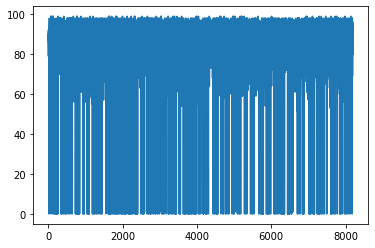

In [ ]:
plt.plot(data_y)
plt.plot(cv.predict(data_X))

In [ ]:
cv.fit(data_X, data_y)
cv.score(data_X, data_y)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


KeyboardInterrupt: 

In [ ]:
cv.best_params_

{'functions': 'id;mul;cos;sin;exp;square;sqrt;id;mul;cos;sin;exp;square;sqrt',
 'n_layers': 2,
 'reg': 0.0001}

In [ ]:
d = {'param_grid': {'n_iter': [10], **hp}}

In [ ]:
cv.set_params(**d)

GridSearchCV(cv=2, estimator=EQLgd(functions='id;mul;cos'), n_jobs=4,
             param_grid={'do_bfgs': (True, False),
                         'functions': ('id;mul;cos;sin;exp;square;sqrt;id;mul;cos;sin;exp;square;sqrt',
                                       'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id'),
                         'n_iter': [10], 'n_layers': (1, 2),
                         'reg': (0.0001, 0.001, 0.01, 0.05)},
             verbose=5)

In [ ]:
cv.predict(data_X)

DeviceArray([[nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],
             [nan],


In [ ]:
str(cv.best_estimator_.get_eqn())

'[nan]'

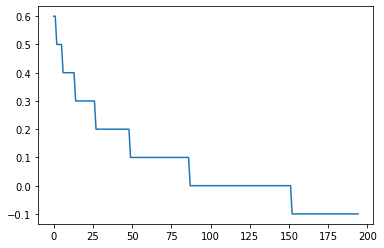

In [ ]:
def sim(c):
    return round(-0.3*math.log(c / 120, 5), 1)
plt.plot([sim(x) for x in np.arange(5, 200)])

In [ ]:
sim(5)

0.99

In [ ]:
def model(est, X=None):
    mapping = {'x'+str(i):k for i,k in enumerate(X.columns)}
    model_str = str(est.best_estimator_.get_eqn())
    for k,v in mapping.items():
        model_str = model_str.replace(k,v)
    return model_str